# Figure 7: CLARC performance in pangenomes of different bacterial species

The reviewers from NAR kindly and rightfully have asked for cross-species validation using pangenomes from species with both closed and open pangenomes. Based on this, I think the following species would be appropiate (in addition to the S. pneumoniae analyses): 

- M. tuberculosis (closed pangenome)
- L. monocytogenes (closed pangenome) [specifically suggested by reviewers, so probably a good idea to try]
- E. coli (open pangenome)
- S. agalactiae 

What I've decided to do is find all closed assemblies starting from 2010 from RefSeq for these bacteria + S. pneumoniae and download their assembly name. For E. coli I capped at 2018 since there have recently been many closed assemblies deposited. I have a table that includes this info and now I need to get a document that will allow me to download these assemblies from RefSeq. Then I will annotate with prokka for consistency. Here are the genome counts for each species: 

- M. tuberculosis - 432
- L. monocytogenes - 423
- E. coli - 670
- S. agalactiae - 156
- S. pneumoniae - 221

## Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
import os
import re
from Bio import SeqIO
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

## Summarize results

In [2]:
columns = ["pre_clarc_acc", "post_clarc_acc", "pre_clarc_core", "post_clarc_core", "acc_change", "core_change", "species", "tool", "identity"]
clarc_results = pd.DataFrame(columns=columns)

In [3]:
species = ['Mtuberculosis','Lmonocytogenes','Sagalactiae','Spneumoniae','Ecoli']
iden = ['i80','i90','i95']

In [4]:
def count_fasta_entries(fasta_path):
    count = 0
    with open(fasta_path, "r") as f:
        for line in f:
            if line.startswith(">"):
                count += 1
    return count

### Summarize Roary results

In [6]:
roary_path = "~/multi-species_roary_clarc" # CLARC results folder found under name multi-species_roary_clarc.zip in Zenodo (https://zenodo.org/records/15156896)
counter = -1
for bact in species:
    for ide in iden:

        counter = counter+1
        
        folder = roary_path+f'/{bact}/{ide}'

        # count pre-CLARC and post-CLARC accessory and core genes
        pre_acc_file = folder+"/clarc_output/accessory_rep_seqs.fasta"
        pre_core_file = folder+"/clarc_output/core_rep_seqs.fasta"
        post_acc_file = folder+"/clarc_output/clarc_results/clarc_acc_cog_seqs.fasta"
        post_core_file = folder+"/clarc_output/clarc_results/clarc_core_cog_seqs.fasta"

        pre_acc_num = count_fasta_entries(pre_acc_file)
        pre_core_num = count_fasta_entries(pre_core_file)
        post_acc_num = count_fasta_entries(post_acc_file)
        post_core_num = count_fasta_entries(post_core_file)

        
        clarc_results.at[counter, "pre_clarc_acc"] = pre_acc_num
        clarc_results.at[counter, "post_clarc_acc"] = post_acc_num
        clarc_results.at[counter, "pre_clarc_core"] = pre_core_num
        clarc_results.at[counter, "post_clarc_core"] = post_core_num

        clarc_results.at[counter, "core_change"] = post_core_num-pre_core_num
        clarc_results.at[counter, "acc_change"] = post_acc_num-pre_acc_num

        clarc_results.at[counter, "species"] = bact
        clarc_results.at[counter, "tool"] = "Roary"
        clarc_results.at[counter, "identity"] = ide

### Summarize Panaroo results

In [7]:
panaroo_path = "~/multi-species_panaroo_clarc" # CLARC results folder found under name multi-species_panaroo_clarc.zip in Zenodo (https://zenodo.org/records/15156896)
counter = -1
iden = ['i80','i90','i98']

for bact in species:
    for ide in iden:

        counter = counter+1
        
        folder = panaroo_path+f'/{bact}/{ide}'

        # count pre-CLARC and post-CLARC accessory and core genes
        pre_acc_file = folder+"/clarc_output/accessory_rep_seqs.fasta"
        pre_core_file = folder+"/clarc_output/core_rep_seqs.fasta"
        post_acc_file = folder+"/clarc_output/clarc_results/clarc_acc_cog_seqs.fasta"
        post_core_file = folder+"/clarc_output/clarc_results/clarc_core_cog_seqs.fasta"
            
        pre_acc_num = count_fasta_entries(pre_acc_file)
        pre_core_num = count_fasta_entries(pre_core_file)
        
        if os.path.exists(post_acc_file):

            post_acc_num = count_fasta_entries(post_acc_file)
            post_core_num = count_fasta_entries(post_core_file)
    
            
            clarc_results.at[counter, "pre_clarc_acc"] = pre_acc_num
            clarc_results.at[counter, "post_clarc_acc"] = post_acc_num
            clarc_results.at[counter, "pre_clarc_core"] = pre_core_num
            clarc_results.at[counter, "post_clarc_core"] = post_core_num
    
            clarc_results.at[counter, "core_change"] = post_core_num-pre_core_num
            clarc_results.at[counter, "acc_change"] = post_acc_num-pre_acc_num

        else:

            clarc_results.at[counter, "pre_clarc_acc"] = pre_acc_num
            clarc_results.at[counter, "post_clarc_acc"] = pre_acc_num
            clarc_results.at[counter, "pre_clarc_core"] = pre_core_num
            clarc_results.at[counter, "post_clarc_core"] = pre_core_num
    
            clarc_results.at[counter, "acc_change"] = 0
            clarc_results.at[counter, "core_change"] = 0

        clarc_results.at[counter, "species"] = bact
        clarc_results.at[counter, "tool"] = "Panaroo"
        clarc_results.at[counter, "identity"] = ide

### Summarize PPanGGOLiN results

In [8]:
ppanggo_path = "~/multi-species_ppanggo_clarc" # CLARC results folder found under name multi-species_ppanggo_clarc.zip in Zenodo (https://zenodo.org/records/15156896)
counter = -1
iden = ['i80','i90','i95']

for bact in species:
    for ide in iden:

        counter = counter+1
        
        folder = ppanggo_path+f'/{bact}/{ide}'

        # count pre-CLARC and post-CLARC accessory and core genes
        pre_acc_file = folder+"/clarc_output/accessory_rep_seqs.fasta"
        pre_core_file = folder+"/clarc_output/core_rep_seqs.fasta"
        post_acc_file = folder+"/clarc_output/clarc_results/clarc_acc_cog_seqs.fasta"
        post_core_file = folder+"/clarc_output/clarc_results/clarc_core_cog_seqs.fasta"

        pre_acc_num = count_fasta_entries(pre_acc_file)
        pre_core_num = count_fasta_entries(pre_core_file)

        if os.path.exists(post_acc_file):

            post_acc_num = count_fasta_entries(post_acc_file)
            post_core_num = count_fasta_entries(post_core_file)
    
            clarc_results.at[counter, "pre_clarc_acc"] = pre_acc_num
            clarc_results.at[counter, "post_clarc_acc"] = post_acc_num
            clarc_results.at[counter, "pre_clarc_core"] = pre_core_num
            clarc_results.at[counter, "post_clarc_core"] = post_core_num
    
            clarc_results.at[counter, "core_change"] = post_core_num-pre_core_num
            clarc_results.at[counter, "acc_change"] = post_acc_num-pre_acc_num

        else:

            clarc_results.at[counter, "pre_clarc_acc"] = pre_acc_num
            clarc_results.at[counter, "post_clarc_acc"] = pre_acc_num
            clarc_results.at[counter, "pre_clarc_core"] = pre_core_num
            clarc_results.at[counter, "post_clarc_core"] = pre_core_num
    
            clarc_results.at[counter, "acc_change"] = 0
            clarc_results.at[counter, "core_change"] = 0

        clarc_results.at[counter, "species"] = bact
        clarc_results.at[counter, "tool"] = "PPanGGOLiN"
        clarc_results.at[counter, "identity"] = ide

## Figures 7A and 7B: Clusters found by CLARC in pangenomes built with complete assemblies of different bacterial species

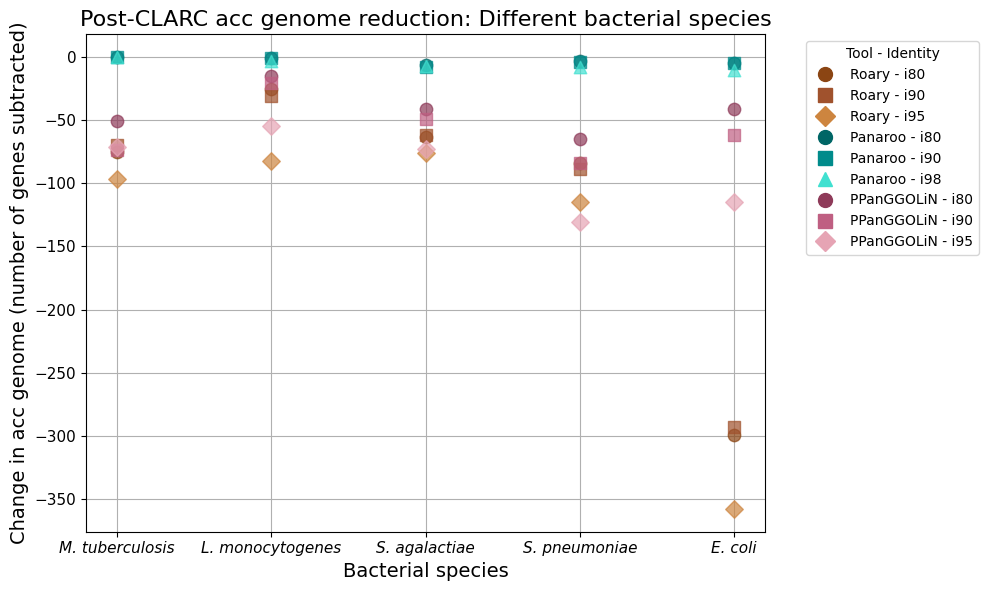

In [9]:
tool_identity_colors = {
    ("Roary", "i80"): "#8B4513",
    ("Roary", "i90"): "#A0522D",
    ("Roary", "i95"): "#CD853F",
    ("Roary", "i98"): "#DEB887",
    ("Panaroo", "i80"): "#006666",
    ("Panaroo", "i90"): "#008B8B",
    ("Panaroo", "i95"): "#20B2AA",
    ("Panaroo", "i98"): "#40E0D0",
    ("PPanGGOLiN", "i80"): "#8E3A59",
    ("PPanGGOLiN", "i90"): "#BF5F82",
    ("PPanGGOLiN", "i95"): "#E6A4B4",
    ("PPanGGOLiN", "i98"): "#EE82EE"
}

identity_markers = {
    "i80": "o", "i90": "s", "i95": "D", "i98": "^"
}

plt.figure(figsize=(10, 6))
plt.grid(True, zorder=0)  

for _, row in clarc_results.iterrows():
    plt.scatter(row["species"], row["acc_change"], 
                color=tool_identity_colors[(row["tool"], row["identity"])], 
                marker=identity_markers[row["identity"]], 
                s=80, edgecolors=None, alpha=0.7, zorder=2)

legend_patches = [
    mlines.Line2D([0], [0], marker=identity_markers[identity], color=color, linestyle='None',
                  markersize=10, markerfacecolor=color, label=f"{tool} - {identity}")
    for (tool, identity), color in tool_identity_colors.items()
    if ((clarc_results["tool"] == tool) & (clarc_results["identity"] == identity)).any()
]

plt.legend(handles=legend_patches, title="Tool - Identity", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.xlabel("Bacterial species", fontsize=14)
plt.ylabel("Change in acc genome (number of genes subtracted)", fontsize=14)
plt.title("Post-CLARC acc genome reduction: Different bacterial species", fontsize=16)

species_labels = ["M. tuberculosis", "L. monocytogenes", "S. agalactiae", "S. pneumoniae", "E. coli"] 
plt.xticks(ticks=range(len(species_labels)), labels=species_labels, fontstyle='italic')
plt.tight_layout()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

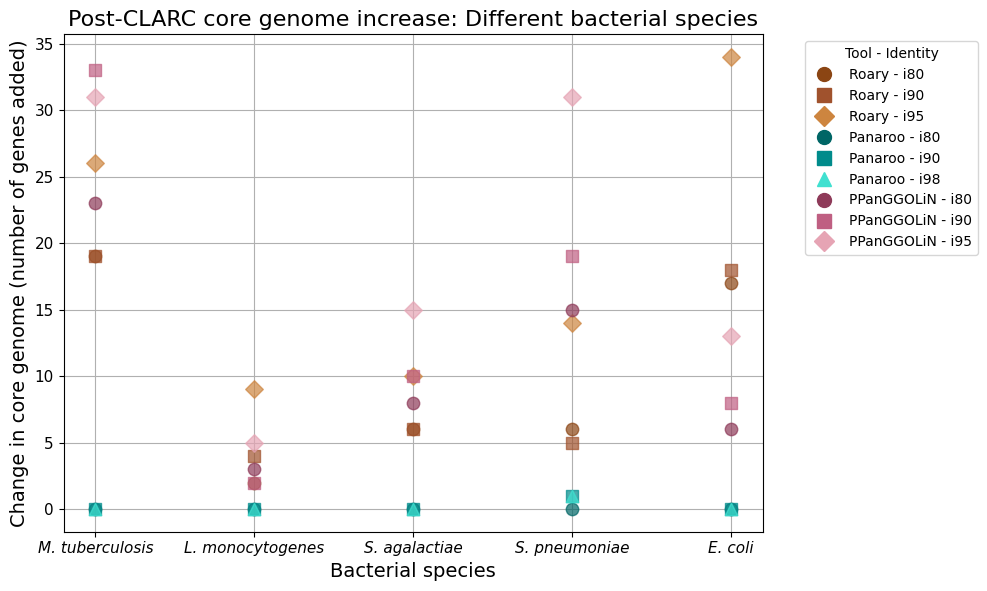

In [10]:
tool_identity_colors = {
    ("Roary", "i80"): "#8B4513",
    ("Roary", "i90"): "#A0522D",
    ("Roary", "i95"): "#CD853F",
    ("Roary", "i98"): "#DEB887",
    ("Panaroo", "i80"): "#006666",
    ("Panaroo", "i90"): "#008B8B",
    ("Panaroo", "i95"): "#20B2AA",
    ("Panaroo", "i98"): "#40E0D0",
    ("PPanGGOLiN", "i80"): "#8E3A59",
    ("PPanGGOLiN", "i90"): "#BF5F82",
    ("PPanGGOLiN", "i95"): "#E6A4B4",
    ("PPanGGOLiN", "i98"): "#EE82EE"
}

identity_markers = {
    "i80": "o", "i90": "s", "i95": "D", "i98": "^"
}

plt.figure(figsize=(10, 6))
plt.grid(True, zorder=0)  

for _, row in clarc_results.iterrows():
    plt.scatter(row["species"], row["core_change"], 
                color=tool_identity_colors[(row["tool"], row["identity"])], 
                marker=identity_markers[row["identity"]], 
                s=80, edgecolors=None, alpha=0.7, zorder=2)

legend_patches = [
    mlines.Line2D([0], [0], marker=identity_markers[identity], color=color, linestyle='None',
                  markersize=10, markerfacecolor=color, label=f"{tool} - {identity}", zorder=3)
    for (tool, identity), color in tool_identity_colors.items()
    if ((clarc_results["tool"] == tool) & (clarc_results["identity"] == identity)).any()
]

plt.legend(handles=legend_patches, title="Tool - Identity", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.xlabel("Bacterial species", fontsize=14)
plt.ylabel("Change in core genome (number of genes added)", fontsize=14)
plt.title("Post-CLARC core genome increase: Different bacterial species", fontsize=16)

species_labels = ["M. tuberculosis", "L. monocytogenes", "S. agalactiae", "S. pneumoniae", "E. coli"] 
plt.xticks(ticks=range(len(species_labels)), labels=species_labels, fontstyle='italic')
plt.tight_layout()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

## Figures 7C and 7D: Is the genomic context of the clusters found by CLARC generally conserved?

Question: Do COGs that are in the same CLARC cluster tend to have the same genes flanking them? (we should try both with core genes and with genes generally)

Steps of the analysis:

- For every COG identified as part of a CLARC cluster, we need a list of the COG to the left/right and the _core_ COGs to the left/right. 
- Let's first build a dataframe where each row is a sample name and each subsequent column is the COGs in order
- We need to convert the tag to the COG name using the pangenome output
- Then we check if all COGs within each CLARC cluster share the same flanking core genes to the left and right

In [11]:
# Function to loop through gene presence absence csv output and get the list of COGs that are in all members of the population

### Function to filter for core cogs

def get_pop_core_pres_abs(data_path, core_lower):

    # Now we filter by frequency per each dataset (this can change depending on the datasets we want to include)

    pres_abs_path = data_path+"/gene_presence_absence.csv"

    # Either the user-specified list, or the one created by CLARC
    sample_needed_path = data_path+'/needed_sample_names.txt'

    # Import Roary output
    igopan_all_roary = pd.read_csv(pres_abs_path, low_memory=False)

    # Bakta often has spaces and special characters in its gene names, which can cause problems in the downstream analyses. So here we turn them into underscores.
    igopan_all_roary["Gene"] = igopan_all_roary["Gene"].str.replace("[ ,\'\"]", "_", regex=True)

    panroary_ids_list =  list(igopan_all_roary["Gene"])
    igopan_all_roary.set_index('Gene', inplace=True)
    roary_isol = igopan_all_roary.iloc[:,13:]

    roary_isol[~roary_isol.isnull()] = 1
    roary_isol[roary_isol.isnull()] = 0

    roary_genefreq_matrix = roary_isol.transpose()

    with open(sample_needed_path, 'r') as file:
        acc_needed_list = file.read().splitlines()

    genefreq_mat_filt = roary_genefreq_matrix[roary_genefreq_matrix.index.isin(acc_needed_list)]

    def get_freq(dataframe):

        cog_list = []
        freq_list = []

        for element in dataframe.columns:

            freq_dataframe = pd.DataFrame()
            cog_freq = (dataframe[element].sum())/(dataframe.shape[0])

            cog_list.append(element)
            freq_list.append(cog_freq)

        freq_dataframe['COG_name'] = cog_list
        freq_dataframe['freq'] = freq_list

        return(freq_dataframe)


    # Get list of genes and their frequency for desired population

    #Navajo all
    freq_cog_navajo = get_freq(genefreq_mat_filt)

    # Make sure the frequencies are numeric
    freq_cog_navajo['freq'] = pd.to_numeric(freq_cog_navajo['freq'], errors='coerce')

    # Now filter to only keep cogs with frequency over a given frequency (default 95%) within the given sample subset
    core_cog_navajo = freq_cog_navajo[(freq_cog_navajo['freq'] >= core_lower)]

    # Get the number of core cogs per dataset
    corecog_num_navajo = core_cog_navajo.shape[0]

    # Get core cog names as lists
    corecog_name_navajo_list = list(core_cog_navajo["COG_name"])

    return corecog_name_navajo_list

In [12]:
def extract_locus_tags(gff_file):
    locus_tags = []
    file_name = os.path.basename(gff_file).replace(".gff", "")  # Get file name without extension

    with open(gff_file, "r") as f:
        for line in f:
            if line.startswith("#"):
                continue
            fields = line.strip().split("\t")
            if len(fields) < 9: 
                continue
                
            attributes = fields[8]
            match = re.search(r"locus_tag=([^;]+)", attributes)
            if match:
                locus_tags.append(match.group(1))

    return file_name, locus_tags

In [13]:
def mark_core_gene(gene):
    if isinstance(gene, str) and gene in core_gene_list:
        return gene + "_core"
    return gene

In [14]:
def find_closest_core(row_genes, start_idx, direction):
    n = len(row_genes)
    step = 1 if direction == "right" else -1
    
    for i in range(1, n):  
        idx = (start_idx + step * i) % n 
        if row_genes[idx] and row_genes[idx].endswith("_core"):
            return row_genes[idx]
    return None 

In [21]:
def all_lists_equal(lst_of_lsts):
    first_set = set(lst_of_lsts[0])
    return all(set(lst) == first_set for lst in lst_of_lsts)

### Figure 7C - Genomic context conservation in CLARC clusters identified from Roary

In [ ]:
# Let's loop through all species - Roary
species = ['Mtuberculosis','Lmonocytogenes','Sagalactiae','Spneumoniae','Ecoli']
id_list = ['i95','i90','i80']
context_hits_roary = pd.DataFrame(columns=['species','id','total_clusters','true_clusters','false_clusters'])
counter1 = -1

for bact in species: 
    for idt in id_list:

        counter1 = counter1+1
        
        gff_path = f"~/multi-species_prokka_annotations.zip/{bact}" # Folder with all annotation files can be found in Zenodo (https://zenodo.org/records/15156896) with the name multi-species_prokka_annotations.zip

        gff_files = glob.glob(gff_path+"/*.gff") 
        
        data = []
        for gff_file in gff_files:
            file_name, locus_tags = extract_locus_tags(gff_file)
            data.append([file_name] + locus_tags) 
        
        max_columns = max(len(row) for row in data) 
        gff_df = pd.DataFrame(data, columns=["Sample"] + [f"CDS_{i+1}" for i in range(max_columns - 1)])
    
        gene_mapping = pd.read_csv(f"~/multi-species_roary_clarc/{bact}/{idt}/data/gene_presence_absence.csv", low_memory=False) # CLARC results folder found under name multi-species_roary_clarc.zip in Zenodo (https://zenodo.org/records/15156896)
        
        # Map each locus tag to its respective COG
        locus_tag_columns = gene_mapping.columns[14:] 
        
        # Convert to a lookup table (dictionary for fast queries)
        gene_melted = gene_mapping.melt(id_vars=["Gene"], value_vars=locus_tag_columns, var_name="Genome", value_name="locus_tag").drop(columns=["Genome"])
        gene_melted.dropna(inplace=True) 
        gene_melted["locus_tag"] = gene_melted["locus_tag"].astype(str).str.split("\t")
        gene_melted = gene_melted.explode("locus_tag")
        locus_to_gene_dict = dict(zip(gene_melted["locus_tag"].str.strip(), gene_melted["Gene"].str.strip()))
       
        # Replace locus tags for COG names in new dataframe
        gff_gene_df = gff_df.copy()
        gff_gene_df.iloc[:, 1:] = gff_gene_df.iloc[:, 1:].astype(str).applymap(lambda x: locus_to_gene_dict.get(x, x))
    
        core_lower = 1
        data_path = f"~/multi-species_roary_clarc/{bact}/{idt}/data" # CLARC results folder found under name multi-species_roary_clarc.zip in Zenodo (https://zenodo.org/records/15156896)
        
        core_gene_list = get_pop_core_pres_abs(data_path, core_lower)
    
        def mark_core_gene(gene):
            if isinstance(gene, str) and gene in core_gene_list:
                return gene + "_core"
            return gene

        # Append suffix "_core" to all core genes
        gff_gene_df_core = gff_gene_df.copy()
        gff_gene_df_core.iloc[:, 1:] = gff_gene_df.iloc[:, 1:].applymap(mark_core_gene)
    
    
        # Get list of genes identified as part of a CLARC cluster
        
        with open(f"~/multi-species_roary_clarc/{bact}/{idt}/clarc_output/clarc_results/accessory_cluster_cogs.txt", "r") as f: # CLARC results folder found under name multi-species_roary_clarc.zip in Zenodo (https://zenodo.org/records/15156896)
        
            acc_list = [line.strip() for line in f]
        
        with open(f"~/multi-species_roary_clarc/{bact}/{idt}/clarc_output/clarc_results/core_cluster_cogs.txt", "r") as f: # CLARC results folder found under name multi-species_roary_clarc.zip in Zenodo (https://zenodo.org/records/15156896)
        
            core_list = [line.strip() for line in f]
        
        clarc_cluster_cogs = acc_list + core_list
    
        df = gff_gene_df_core.copy()
        gene_matrix = df.iloc[:, 1:].to_numpy() 
        
        results = []
        
        for idx, row in enumerate(gene_matrix):
            row_genes = list(row)  
        
            for gene in clarc_cluster_cogs:
                if gene in row_genes:
                    pos = row_genes.index(gene)  # Find index of gene
                    
                    left_neighbor = row_genes[(pos - 1) % len(row_genes)]  # Direct left
                    right_neighbor = row_genes[(pos + 1) % len(row_genes)]  # Direct right
        
                    # Find the closest _core gene in both directions
                    closest_left_core = find_closest_core(row_genes, pos, "left")
                    closest_right_core = find_closest_core(row_genes, pos, "right")
        
                    results.append([df.iloc[idx, 0], gene, left_neighbor, right_neighbor, closest_left_core, closest_right_core])
        
        neighbors_df = pd.DataFrame(results, columns=["Sample", "Gene", "left_cog", "right_cog", "left_core_cog", "right_core_cog"])

        # Import the actual clarc clusters 
        core_cluster_summary = pd.read_csv(f"~/multi-species_roary_clarc/{bact}/{idt}/clarc_output/clarc_results/core_cluster_summary.csv") # CLARC results folder found under name multi-species_roary_clarc.zip in Zenodo (https://zenodo.org/records/15156896)
        
        acc_cluster_summary = pd.read_csv(f"~/multi-species_roary_clarc/{bact}/{idt}/clarc_output/clarc_results/accessory_cluster_summary.csv") # CLARC results folder found under name multi-species_roary_clarc.zip in Zenodo (https://zenodo.org/records/15156896)
        
        
        core_cog_columns = [col for col in core_cluster_summary.columns if col.startswith("COG")]
        acc_cog_columns = [col for col in acc_cluster_summary.columns if col.startswith("COG")]
        cluster_core_cog_list = core_cluster_summary[core_cog_columns].apply(lambda row: [x for x in row if pd.notna(x)], axis=1).tolist()
        cluster_acc_cog_list = acc_cluster_summary[acc_cog_columns].apply(lambda row: [x for x in row if pd.notna(x)], axis=1).tolist()
        cluster_cog_list = cluster_core_cog_list+cluster_acc_cog_list
    
        cluster_context_check = pd.DataFrame(columns=['cluster_cogs','same_context_flag'], index=range(len(cluster_cog_list)))
        cluster_context_check['same_context_flag'] = False
        counter = -1
        for cluster_list in cluster_cog_list:
            
            counter = counter+1
            cluster_context_check.at[counter, "cluster_cogs"] = cluster_list
            num_cogs = len(cluster_list)
            
            consensus_context = []
            for i in range(num_cogs):
        
                cog = cluster_list[i]
                x = neighbors_df[neighbors_df['Gene']==f'{cog}']
                x["cog_pair"] = x.apply(lambda row: tuple(sorted([row["left_core_cog"], row["right_core_cog"]])), axis=1)
                cog_combinations = x.groupby("cog_pair").size().reset_index(name="count")
                most_common = cog_combinations.loc[cog_combinations["count"].idxmax()]
                consensus_cluster = most_common[0]
                consensus_context.append(consensus_cluster)
        
            # Check if all COGs in the cluster have the same flanking COGs
            cluster_context_check.at[counter, "same_context_flag"] = all_lists_equal(consensus_context)


        false_count = len(cluster_context_check[cluster_context_check['same_context_flag']==False])
        true_count = len(cluster_context_check[cluster_context_check['same_context_flag']==True])

        context_hits_roary.at[counter1, "false_clusters"] = false_count
        context_hits_roary.at[counter1, "true_clusters"] = true_count
        context_hits_roary.at[counter1, "total_clusters"] = false_count+true_count

        context_hits_roary.at[counter1, "species"] = bact
        context_hits_roary.at[counter1, "id"] = idt

In [ ]:
context_hits_roary['freq_conserved'] = context_hits_roary['true_clusters']/context_hits_roary['total_clusters']
context_hits_roary['freq_notconserved'] = context_hits_roary['false_clusters']/context_hits_roary['total_clusters']

id_colors = {
    "i95": "#CD853F",  
    "i90": "#A0522D",  
    "i80": "#8B4513"   
}

species_order = ["Mtuberculosis", "Lmonocytogenes", "Sagalactiae", "Spneumoniae", "Ecoli"]
id_order = ["i80", "i90", "i95"]

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.2
group_spacing = 0.5  
bar_spacing = 0.05  # Small space between bars within a species
x_positions = np.arange(len(species_order)) * (len(id_order) * (bar_width + bar_spacing) + group_spacing)

for j, id_value in enumerate(id_order):
    conserved_values = [context_hits_roary[(context_hits_roary["species"] == species) & 
                                           (context_hits_roary["id"] == id_value)]["freq_conserved"].values[0] 
                        if not context_hits_roary[(context_hits_roary["species"] == species) & 
                                                  (context_hits_roary["id"] == id_value)].empty else 0 
                        for species in species_order]

    bar_x = x_positions + (j - 1) * (bar_width + bar_spacing)
    ax.bar(bar_x, conserved_values, width=bar_width, color=id_colors[id_value], edgecolor="black", label=f"{id_value}")

ax.set_xticks(x_positions + bar_width / 2)
ax.set_xticklabels(["M. tuberculosis", "L. monocytogenes", "S. agalactiae", "S. pneumoniae", "E. coli"], ha="center", fontstyle='italic')
ax.set_xlabel("Bacterial species", fontsize=12)
ax.set_ylabel("Proportion of clusters with conserved genomic context", fontsize=12)

ax.legend(title="Roary identity threshold", loc="upper center", bbox_to_anchor=(0.5, -0.10), ncol=3)
ax.grid(True, linestyle="-", linewidth=0.8, alpha=1, axis="y")
ax.set_axisbelow(True)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Figure 7D - Genomic context conservation in CLARC clusters identified from PPanGGOLiN

In [27]:
def get_pop_core_pres_abs_ppanggo(data_path, core_lower):

    # Now we filter by frequency per each dataset (this can change depending on the datasets we want to include)
    pres_abs_path = data_path+"/gene_presence_absence.Rtab"
    sample_needed_path = data_path+'/needed_sample_names.txt'
    
    # Import Ppanggo output
    igopan_all_ppanggo = pd.read_csv(pres_abs_path, sep='\t', comment='#')
    #igopan_all_ppanggo  = igopan_all_ppanggo .T
    
    # Bakta often has spaces and special characters in its gene names, which can cause problems in the downstream analyses. So here we can turn them into underscores. I'm still deciding if this update is necessary. I think as long as the fasta files pick up the whole name, it should be fine.
    # Update: this was absolutely necessary
    igopan_all_ppanggo["Gene"] = igopan_all_ppanggo["Gene"].str.replace("[ ,\'\"]", "_", regex=True)
    
    # Get list of PPanGGolin output names in a list
    panppanggo_ids_list =  list(igopan_all_ppanggo["Gene"])
    
    # Now make gene names the indeces
    #roary_onefilt.set_index('Gene', inplace=True)
    igopan_all_ppanggo.set_index('Gene', inplace=True)
    
    # Switch rows to columns for ease
    ppanggo_genefreq_matrix = igopan_all_ppanggo.transpose()
    ppanggo_genefreq_matrix.index.name='Accession'
    
    # Get list of sample names in the subpopulation to analyse
    with open(sample_needed_path, 'r') as file:
        acc_needed_list = file.read().splitlines()
    
    # Get only isolates in the list
    genefreq_mat_filt = ppanggo_genefreq_matrix[ppanggo_genefreq_matrix.index.isin(acc_needed_list)]
    
    # Write function that loops through each gene column and returns the frequency in the dataframe
    def get_freq(dataframe):
    
        cog_list = []
        freq_list = []

        for element in dataframe.columns:
    
            freq_dataframe = pd.DataFrame()
            cog_freq = (dataframe[element].sum())/(dataframe.shape[0])
    
            cog_list.append(element)
            freq_list.append(cog_freq)
    
        freq_dataframe['COG_name'] = cog_list
        freq_dataframe['freq'] = freq_list
    
        return(freq_dataframe)
    
    # Get list of genes and their frequency for desired population
    
    #Navajo all
    freq_cog_navajo = get_freq(genefreq_mat_filt)
    
    # Make sure the frequencies are numeric
    freq_cog_navajo['freq'] = pd.to_numeric(freq_cog_navajo['freq'], errors='coerce')
    
    # Now filter to only keep cogs with frequency over a given frequency (default 95%) within the given sample subset
    core_cog_navajo = freq_cog_navajo[(freq_cog_navajo['freq'] >= core_lower)]
    
    # Get the number of core cogs per dataset
    corecog_num_navajo = core_cog_navajo.shape[0]
    
    # Get core cog names as lists
    corecog_name_navajo_list = list(core_cog_navajo["COG_name"])

    return(corecog_name_navajo_list)

In [ ]:
# Let's loop through all species: PPanGGOLiN
species = ['Mtuberculosis','Lmonocytogenes','Sagalactiae','Spneumoniae','Ecoli']
id_list = ['i95','i90','i80']
context_hits_species_ppanggo = pd.DataFrame(columns=['species','id','total_clusters','true_clusters','false_clusters'])
counter1 = -1

for bact in species: 
    for idt in id_list:

        counter1 = counter1+1
        
        gff_path = f"~/multi-species_prokka_annotations.zip/{bact}" # Folder with all annotation files can be found in Zenodo (https://zenodo.org/records/15156896) with the name multi-species_prokka_annotations.zip

        gff_files = glob.glob(gff_path+"/*.gff") 
        
        data = []
        for gff_file in gff_files:
            file_name, locus_tags = extract_locus_tags(gff_file)
            data.append([file_name] + locus_tags) 
        
        max_columns = max(len(row) for row in data) 
        gff_df = pd.DataFrame(data, columns=["Sample"] + [f"CDS_{i+1}" for i in range(max_columns - 1)])
    
        gene_mapping = pd.read_csv(f"~/multi-species_roary_clarc/{bact}/{idt}/data/matrix.csv", low_memory=False) # CLARC results folder found under name multi-species_ppanggo_clarc.zip in Zenodo (https://zenodo.org/records/15156896)
        
        # Map each locus tag to its respective COG
        locus_tag_columns = gene_mapping.columns[14:] 
        
        # Convert to a lookup table (dictionary for fast queries)
        gene_melted = gene_mapping.melt(id_vars=["Gene"], value_vars=locus_tag_columns, var_name="Genome", value_name="locus_tag").drop(columns=["Genome"])
        gene_melted.dropna(inplace=True) 
        gene_melted["locus_tag"] = gene_melted["locus_tag"].astype(str).str.split("\t")
        gene_melted = gene_melted.explode("locus_tag")
        locus_to_gene_dict = dict(zip(gene_melted["locus_tag"].str.strip(), gene_melted["Gene"].str.strip()))
        #locus_to_gene_dict = dict(zip(gene_melted["locus_tag"].astype(str).str.strip(), gene_melted["Gene"].astype(str).str.strip()))
        
        # Replace locus tags for COG names in new dataframe
        gff_gene_df = gff_df.copy()
        gff_gene_df.iloc[:, 1:] = gff_gene_df.iloc[:, 1:].astype(str).applymap(lambda x: locus_to_gene_dict.get(x, x))
    
        core_lower = 1
        data_path = f"~/multi-species_roary_clarc/{bact}/{idt}/data" # CLARC results folder found under name multi-species_ppanggo_clarc.zip in Zenodo (https://zenodo.org/records/15156896)
        
        core_gene_list = get_pop_core_pres_abs_ppanggo(data_path, core_lower)
    
        def mark_core_gene(gene):
            if isinstance(gene, str) and gene in core_gene_list:
                return gene + "_core"
            return gene

        # Append suffix "_core" to all core genes
        gff_gene_df_core = gff_gene_df.copy()
        gff_gene_df_core.iloc[:, 1:] = gff_gene_df.iloc[:, 1:].applymap(mark_core_gene)
    
    
        # Get list of genes identified as part of a CLARC cluster
        
        with open(f"~/multi-species_roary_clarc/{bact}/{idt}/clarc_output/clarc_results/accessory_cluster_cogs.txt", "r") as f: # CLARC results folder found under name multi-species_ppanggo_clarc.zip in Zenodo (https://zenodo.org/records/15156896)
        
            acc_list = [line.strip() for line in f]
        
        with open(f"~/multi-species_roary_clarc/{bact}/{idt}/clarc_output/clarc_results/core_cluster_cogs.txt", "r") as f: # CLARC results folder found under name multi-species_ppanggo_clarc.zip in Zenodo (https://zenodo.org/records/15156896)
        
            core_list = [line.strip() for line in f]
        
        clarc_cluster_cogs = acc_list + core_list
    
        df = gff_gene_df_core.copy()
        gene_matrix = df.iloc[:, 1:].to_numpy() 
        
        results = []
        
        for idx, row in enumerate(gene_matrix):
            row_genes = list(row)  
        
            for gene in clarc_cluster_cogs:
                if gene in row_genes:
                    pos = row_genes.index(gene)  # Find index of gene
                    
                    left_neighbor = row_genes[(pos - 1) % len(row_genes)]  # Direct left
                    right_neighbor = row_genes[(pos + 1) % len(row_genes)]  # Direct right
        
                    # Find the closest _core gene in both directions
                    closest_left_core = find_closest_core(row_genes, pos, "left")
                    closest_right_core = find_closest_core(row_genes, pos, "right")
        
                    results.append([df.iloc[idx, 0], gene, left_neighbor, right_neighbor, closest_left_core, closest_right_core])
        
        neighbors_df = pd.DataFrame(results, columns=["Sample", "Gene", "left_cog", "right_cog", "left_core_cog", "right_core_cog"])

        # Import the actual clarc clusters 
        core_cluster_summary = pd.read_csv(f"~/multi-species_roary_clarc/{bact}/{idt}/clarc_output/clarc_results/core_cluster_summary.csv") # CLARC results folder found under name multi-species_ppanggo_clarc.zip in Zenodo (https://zenodo.org/records/15156896)
        
        acc_cluster_summary = pd.read_csv(f"~/multi-species_roary_clarc/{bact}/{idt}/clarc_output/clarc_results/accessory_cluster_summary.csv") # CLARC results folder found under name multi-species_ppanggo_clarc.zip in Zenodo (https://zenodo.org/records/15156896)
        
        core_cog_columns = [col for col in core_cluster_summary.columns if col.startswith("COG")]
        acc_cog_columns = [col for col in acc_cluster_summary.columns if col.startswith("COG")]
        cluster_core_cog_list = core_cluster_summary[core_cog_columns].apply(lambda row: [x for x in row if pd.notna(x)], axis=1).tolist()
        cluster_acc_cog_list = acc_cluster_summary[acc_cog_columns].apply(lambda row: [x for x in row if pd.notna(x)], axis=1).tolist()
        cluster_cog_list = cluster_core_cog_list+cluster_acc_cog_list
    
        cluster_context_check = pd.DataFrame(columns=['cluster_cogs','same_context_flag'], index=range(len(cluster_cog_list)))
        cluster_context_check['same_context_flag'] = False
        counter = -1
        for cluster_list in cluster_cog_list:
            
            counter = counter+1
            cluster_context_check.at[counter, "cluster_cogs"] = cluster_list
            num_cogs = len(cluster_list)
            
            consensus_context = []
            for i in range(num_cogs):
        
                cog = cluster_list[i]
                x = neighbors_df[neighbors_df['Gene']==f'{cog}']
                x["cog_pair"] = x.apply(lambda row: tuple(sorted([row["left_core_cog"], row["right_core_cog"]])), axis=1)
                cog_combinations = x.groupby("cog_pair").size().reset_index(name="count")
                most_common = cog_combinations.loc[cog_combinations["count"].idxmax()]
                consensus_cluster = most_common[0]
                consensus_context.append(consensus_cluster)
        
            # Check if all COGs in the cluster have the same flanking COGs
            cluster_context_check.at[counter, "same_context_flag"] = all_lists_equal(consensus_context)


        false_count = len(cluster_context_check[cluster_context_check['same_context_flag']==False])
        true_count = len(cluster_context_check[cluster_context_check['same_context_flag']==True])

        context_hits_species_ppanggo.at[counter1, "false_clusters"] = false_count
        context_hits_species_ppanggo.at[counter1, "true_clusters"] = true_count
        context_hits_species_ppanggo.at[counter1, "total_clusters"] = false_count+true_count

        context_hits_species_ppanggo.at[counter1, "species"] = bact
        context_hits_species_ppanggo.at[counter1, "id"] = idt

In [ ]:
context_hits_ppanggo = context_hits_species_ppanggo.copy()

context_hits_ppanggo['freq_conserved'] = context_hits_ppanggo['true_clusters']/context_hits_ppanggo['total_clusters']
context_hits_ppanggo['freq_notconserved'] = context_hits_ppanggo['false_clusters']/context_hits_ppanggo['total_clusters']

id_colors = {
    "i95": "#E6A4B4",  
    "i90": "#BF5F82",  
    "i80": "#8E3A59"   
}

species_order = ["Mtuberculosis", "Lmonocytogenes", "Sagalactiae", "Spneumoniae", "Ecoli"]
id_order = ["i80", "i90", "i95"]

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.2
group_spacing = 0.5  
bar_spacing = 0.05  # Small space between bars within a species
x_positions = np.arange(len(species_order)) * (len(id_order) * (bar_width + bar_spacing) + group_spacing)

for j, id_value in enumerate(id_order):
    conserved_values = [context_hits_ppanggo[(context_hits_ppanggo["species"] == species) & 
                                           (context_hits_ppanggo["id"] == id_value)]["freq_conserved"].values[0] 
                        if not context_hits_ppanggo[(context_hits_ppanggo["species"] == species) & 
                                                  (context_hits_ppanggo["id"] == id_value)].empty else 0 
                        for species in species_order]

    bar_x = x_positions + (j - 1) * (bar_width + bar_spacing)
    ax.bar(bar_x, conserved_values, width=bar_width, color=id_colors[id_value], edgecolor="black", label=f"{id_value}")

ax.set_xticks(x_positions + bar_width / 2)
ax.set_xticklabels(["M. tuberculosis", "L. monocytogenes", "S. agalactiae", "S. pneumoniae", "E. coli"], ha="center", fontstyle='italic')
ax.set_xlabel("Bacterial species", fontsize=12)
ax.set_ylabel("Proportion of clusters with conserved genomic context", fontsize=12)

ax.legend(title="PPanGGOLiN identity threshold", loc="upper center", bbox_to_anchor=(0.5, -0.10), ncol=3)
ax.grid(True, linestyle="-", linewidth=0.8, alpha=1, axis="y")
ax.set_axisbelow(True)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()